In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"honeyproduction.csv")
df.head()


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
df.describe(include="all")

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
unique,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,NaN,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,NaN,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,NaN,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,NaN,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,NaN,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000


In [6]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [8]:
df['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'SC'],
      dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [10]:
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
#Encoding
df.select_dtypes('object').columns

Index(['state'], dtype='object')

In [13]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

df[['state']]=oe.fit_transform(df[['state']])

df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,0.0,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,2.0,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,1.0,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,3.0,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,4.0,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [14]:
oe.categories_

[array(['AL', 'AR', 'AZ', 'CA', 'CO', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
        'IN', 'KS', 'KY', 'LA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
        'NC', 'ND', 'NE', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
        'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
       dtype=object)]

In [19]:


state_dict = {}
state_list = ['AL', 'AR', 'AZ', 'CA', 'CO', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
              'IN', 'KS', 'KY', 'LA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
              'NC', 'ND', 'NE', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
              'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

for index, state in enumerate(state_list, start=0):
    state_dict[state] = index

print(state_dict)

{'AL': 0, 'AR': 1, 'AZ': 2, 'CA': 3, 'CO': 4, 'FL': 5, 'GA': 6, 'HI': 7, 'IA': 8, 'ID': 9, 'IL': 10, 'IN': 11, 'KS': 12, 'KY': 13, 'LA': 14, 'MD': 15, 'ME': 16, 'MI': 17, 'MN': 18, 'MO': 19, 'MS': 20, 'MT': 21, 'NC': 22, 'ND': 23, 'NE': 24, 'NJ': 25, 'NM': 26, 'NV': 27, 'NY': 28, 'OH': 29, 'OK': 30, 'OR': 31, 'PA': 32, 'SC': 33, 'SD': 34, 'TN': 35, 'TX': 36, 'UT': 37, 'VA': 38, 'VT': 39, 'WA': 40, 'WI': 41, 'WV': 42, 'WY': 43}


In [21]:
state='AL'
if state in state_dict:
    print(state_dict[state])

0


In [18]:
df['state'].describe()

count    626.000000
mean      21.215655
std       12.877011
min        0.000000
25%       10.000000
50%       21.000000
75%       32.000000
max       43.000000
Name: state, dtype: float64

In [17]:
oe.

{'categories': 'auto',
 'dtype': numpy.float64,
 'encoded_missing_value': nan,
 'handle_unknown': 'error',
 'max_categories': None,
 'min_frequency': None,
 'unknown_value': None}

<Axes: >

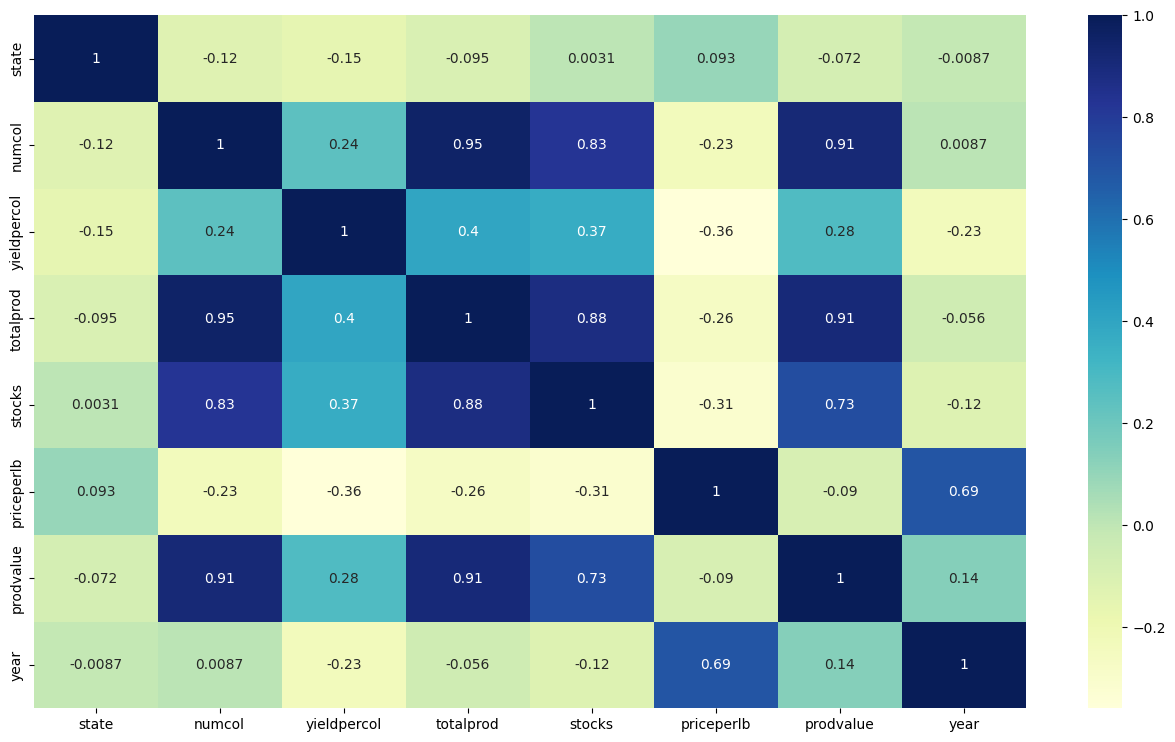

In [16]:
# correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

<Axes: title={'center': 'Correlation with priceperlb'}>

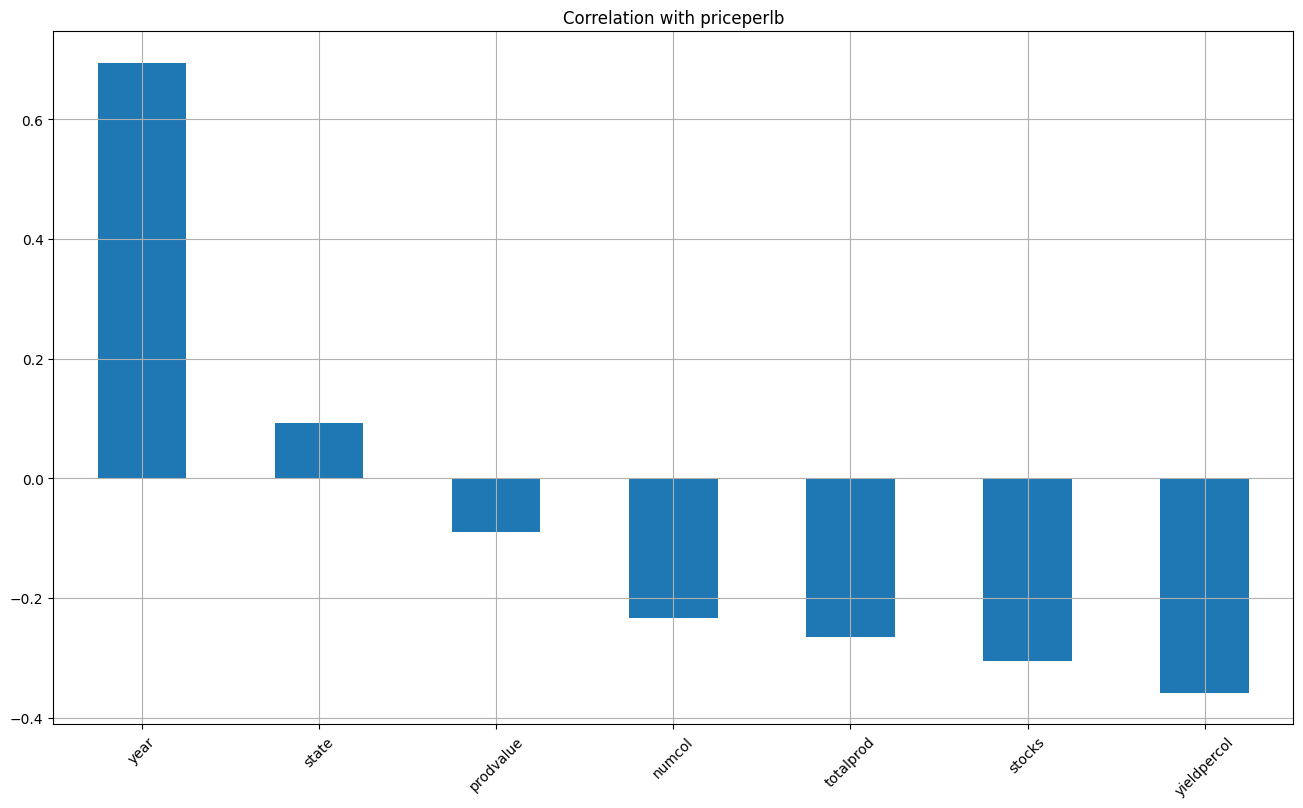

In [18]:
df_2 = df.drop(columns='priceperlb')

df_2.corrwith(df['priceperlb']).sort_values(ascending=False).plot.bar(
    figsize=(16,9), title = 'Correlation with priceperlb', 
    rot = 45, grid = True
)

In [19]:
x=df.drop('priceperlb',axis=1)
y=df['priceperlb']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)

In [21]:
x_train, x_test, y_train, y_test

(     state    numcol  yieldpercol   totalprod     stocks   prodvalue  year
 248   31.0   42000.0           51   2142000.0   964000.0   2720000.0  2003
 388    4.0   31000.0           51   1581000.0   838000.0   1818000.0  2007
 18    18.0  140000.0           79  11060000.0  2765000.0   7189000.0  1998
 422   42.0    6000.0           48    288000.0    95000.0    602000.0  2007
 349    6.0   63000.0           74   4662000.0   746000.0   5594000.0  2006
 ..     ...       ...          ...         ...        ...         ...   ...
 71    23.0  255000.0          105  26775000.0  8836000.0  15797000.0  1999
 106   19.0   23000.0           75   1725000.0   362000.0   1035000.0  2000
 270   10.0    7000.0           55    385000.0   193000.0    716000.0  2004
 435   11.0    7000.0           67    469000.0   150000.0    788000.0  2008
 102   15.0    6000.0           46    276000.0    52000.0    315000.0  2000
 
 [419 rows x 7 columns],
      state    numcol  yieldpercol   totalprod      stocks   

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,make_scorer

In [24]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
ypred=linreg.predict(x_test)

In [25]:
mae=mean_absolute_error(y_test,ypred)
rmse=np.sqrt(mean_squared_error(y_test,ypred))
R2score=r2_score(y_test,ypred)

print(f'Mean Absolute Error:--{mae}')
print(f'Root Mean Square Error:--{rmse}')
print(f'R2 Score:--{R2score}')

Mean Absolute Error:--0.3190214115261624
Root Mean Square Error:--0.4298131202167127
R2 Score:--0.5796206161560726


In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree= 2)
x_poly=poly.fit_transform(x)
xp_train, xp_test, yp_train, yp_test = train_test_split(x_poly, y, test_size = 0.2,random_state=42)
linregp=LinearRegression()
linregp.fit(xp_train,yp_train)
ypred=linregp.predict(xp_test)

mae=mean_absolute_error(yp_test,ypred,)
rmse=np.sqrt(mean_absolute_error(yp_test,ypred,))
R2score=r2_score(yp_test,ypred)

print(f'Mean Absolute Error:= {mae}')
print(f'Root Mean Square Error:= {rmse}')
print(f'R2 Score:= {R2score}')
print()
train=linregp.score(xp_train,yp_train)
test=linregp.score(xp_test,yp_test)
print(f'Train:-{train}')
print(f'Test:-{test}')


Mean Absolute Error:= 0.2698520328922946
Root Mean Square Error:= 0.5194728413423503
R2 Score:= 0.6841659697794575

Train:-0.7226958126879306
Test:-0.6841659697794575


In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Scaled_xtrain=scaler.fit_transform(x_train)
Scaled_xtest=scaler.transform(x_test)

In [32]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(Scaled_xtrain,y_train)
ypred=linreg.predict(Scaled_xtest)

mae=mean_absolute_error(y_test,ypred,)
rmse=np.sqrt(mean_absolute_error(y_test,ypred,))
R2score=r2_score(y_test,ypred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')
print(f'R2 Score: {R2score}')
print()
train=linreg.score(Scaled_xtrain,y_train)
test=linreg.score(Scaled_xtest,y_test)
print(f'Train: {train}')
print(f'Test: {test}')



Mean Absolute Error: 0.31902141152625535
Root Mean Square Error: 0.5648198044741839
R2 Score: 0.5796206161556698

Train: 0.5785889360645071
Test: 0.5796206161556698


In [36]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)
rfr.fit(x_train,y_train)
ypred=rfr.predict(x_test)

mae=mean_absolute_error(y_test,ypred,)
rmse=np.sqrt(mean_absolute_error(y_test,ypred,))
R2score=r2_score(y_test,ypred)

print(f'Mean Absolute Error:--{mae}')
print(f'Root Mean Square Error:--{rmse}')
print(f'R2 Score:--{R2score}')
print()
train=rfr.score(x_train,y_train)
test=rfr.score(x_test,y_test)
print(f'Train:-{train}')
print(f'Test:-{test}')


Mean Absolute Error:--0.13232463768115937
Root Mean Square Error:--0.36376453604104864
R2 Score:--0.9057734491881559

Train:-0.9794705556911053
Test:-0.9057734491881559


In [33]:
import joblib 
import numpy as np
import pandas as pd
from pathlib import Path

model = joblib.load(Path(r'C:\Users\PUJA\OneDrive\Desktop\Machine_Learning_Project\ML_project-_using_MlFlow\artifacts\model_trainer\model.joblib'))

predict = model.predict(data)

print(predict)

[2.65]


In [32]:
from mlProject.pipeline.prediction import PredictionPipeline
state= 5
numcol = 22
yieldpercol = 22
totalprod =5
stocks =25
prodvalue=22
year=2022

data = [state, numcol, yieldpercol, totalprod, stocks, prodvalue, year]
data = np.array(data).reshape(1, 7)

obj = PredictionPipeline()
predict = obj.predict(data)

print(predict)

FileNotFoundError: [Errno 2] No such file or directory: 'artifacts\\model_trainer\\model.joblib'